## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Applications registered for resale and rental flats

In [314]:
# Read csv into dataframe
df = pd.read_csv("applications-registered-for-resale-flats-and-rental-flats.csv")
df

,financial_year,type,applications_registered
0,2007,resale,29612
1,2007,rental,5970
2,2008,resale,28551
3,2008,rental,3695
4,2009,resale,39320
5,2009,rental,2681
6,2010,resale,30061
7,2010,rental,2736
8,2011,resale,24331
9,2011,rental,4918


Text(0, 0.5, 'Total number of applications registered')

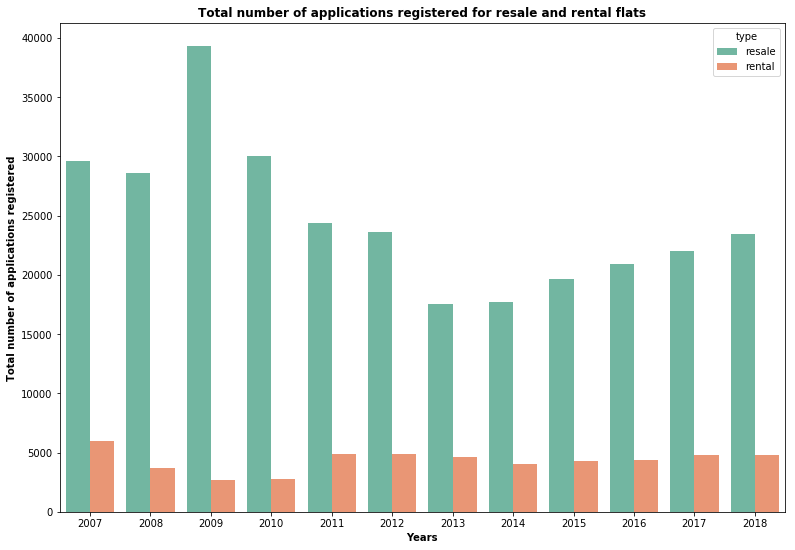

In [229]:
# Creating a bar chart - Introduction
fig_dims = (13, 9)
fig, ax=plt.subplots(figsize=fig_dims)
plt.title("Total number of applications registered for resale and rental flats", fontweight="bold")
sns.barplot(x="financial_year", y="applications_registered", hue="type", palette="Set2",data=df)
ax.set_xlabel("Years", fontweight="bold")
ax.set_ylabel("Total number of applications registered", fontweight="bold")

# Reading the 2 datasets

In [304]:
rentdf = pd.read_csv("median-rent-by-town-and-flat-type.csv", sep=',')
resaledf = pd.read_csv("median-resale-prices-for-registered-applications-by-town-and-flat-type.csv", sep=',')

# Data Preparation

In [306]:
# Filtering out only the West area for rentdf
# West area includes: Bukit Batok, Bukit Panjang, Bukit Timah, CCK, Clementi, Jurong East, Jurong West
west = ("BUKIT BATOK", "BUKIT PANJANG", "BUKIT TIMAH", "CHOA CHU KANG", "CLEMENTI", "JURONG EAST", "JURONG WEST")
westrent = rentdf[rentdf.town.isin(west)]

# Filtering out only the West area for resaledf
# Rename elements (changing to all caps for resale)
resaledf['town'] = resaledf['town'].str.upper()
westresale = resaledf[resaledf.town.isin(west)]


# Filtering out 2007 - 2018
years = "2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018"
yearswestrent = westrent[westrent['quarter'].str.contains(years)]
yearswestresale = westresale[westresale['quarter'].str.contains(years)]


# Filtering out 4 room, 5 room and executive
flats = ("4-RM", "5-RM", "EXEC")
yearswestflatsrent = yearswestrent[yearswestrent.flat_type.isin(flats)]

# Replacing 4-room to 4-RM, 5-room to 5-RM, Executive to EXEC
yearswestresale1 = yearswestresale.replace({'4-room': '4-RM', '5-room': '5-RM', 'Executive': 'EXEC'})
yearswestflatsresale = yearswestresale1[yearswestresale1.flat_type.isin(flats)]

In [308]:
# Combining the two dataframes
rent = yearswestflatsrent.set_index(['quarter', 'town', 'flat_type'])
resale = yearswestflatsresale.set_index(['quarter', 'town', 'flat_type'])
result = pd.concat([rent, resale],axis=1)

# Replacing '-' and n.a to np.NaN
result = result.replace(['na', '-'], np.NaN)
result = result.dropna()
result

# Changing dtypes
result['median_rent'] = result['median_rent'].astype(int)
result['price'] = result['price'].astype(int)

# Data Visualisation

Text(0, 0.5, 'Rental price ($)')

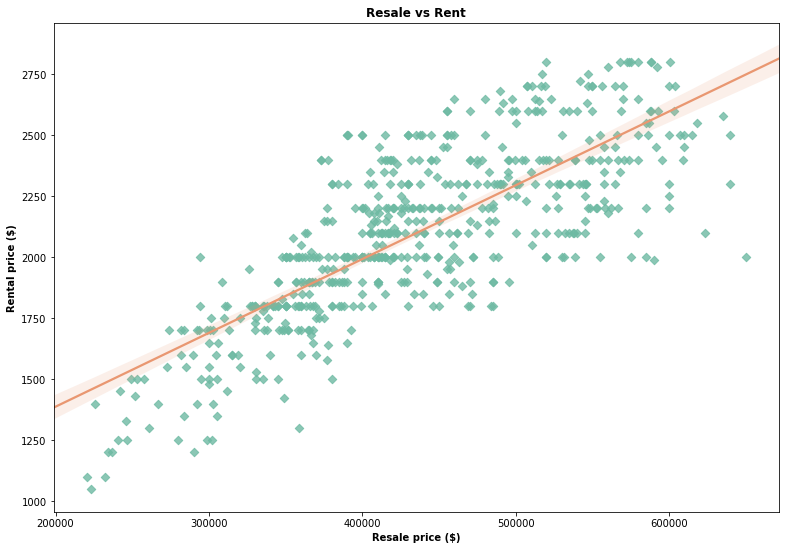

In [307]:
# Creating a scatterplot/regression plot - Intro
fig_dims = (13, 9)
fig, ax=plt.subplots(figsize=fig_dims)
plt.title("Resale vs Rent", fontweight="bold")
sns.regplot(x="price", y="median_rent", marker="D", scatter_kws={"color":"#6EBAA3"}, line_kws={"color":"#E99771"}, data=result)
ax.set_xlabel("Resale price ($)", fontweight="bold")
ax.set_ylabel("Rental price ($)", fontweight="bold")

[Text(0, 0.5, 'Resale price ($)'), Text(0.5, 0, 'Flat Type')]

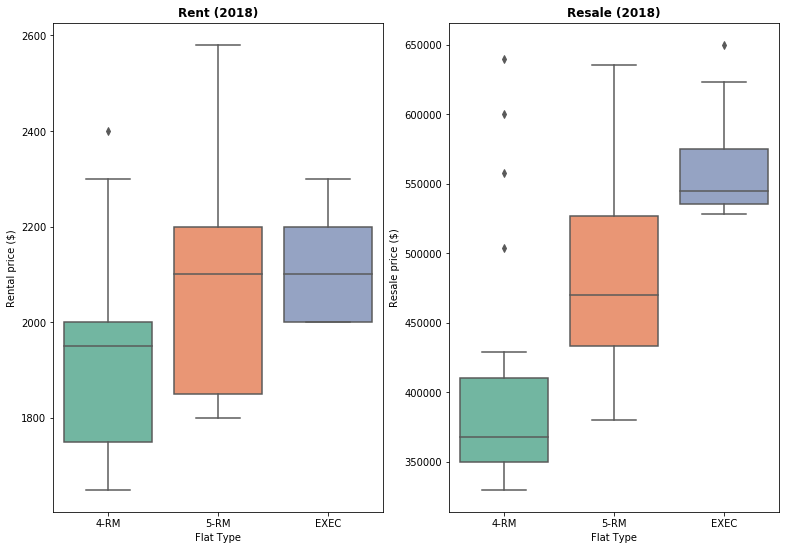

In [309]:
# Filter out 2018
result = result.reset_index()
a = result[result['quarter'].str.contains('2018')]


# Creating a boxplot
fig_dims = (13, 9)
fig, ax=plt.subplots(figsize=fig_dims)
plt.subplot(121)
plt.title("Rent (2018)", fontweight="bold")
sns.boxplot(x=a.flat_type, y="median_rent", palette="Set2", data=a).set(xlabel="Flat Type", ylabel="Rental price ($)")
plt.subplot(122)
plt.title("Resale (2018)", fontweight="bold")
sns.boxplot(x=a.flat_type, y="price", palette="Set2", data=a).set(xlabel="Flat Type", ylabel="Resale price ($)")


[Text(0, 0.5, 'Resale price ($)'), Text(0.5, 0, 'Quarter')]

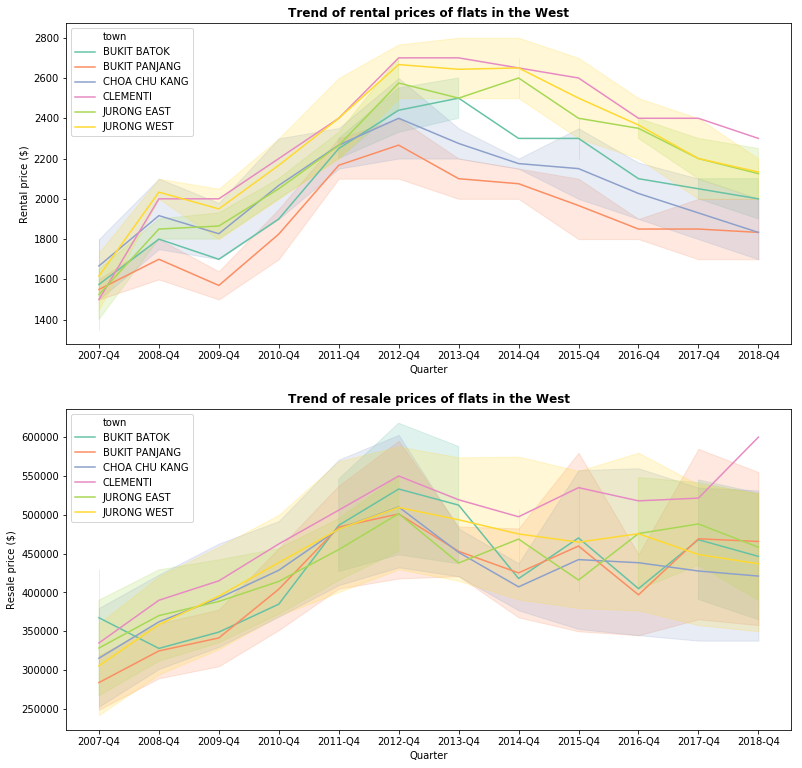

In [311]:
# Extract only Q4 of every year
b = result[result['quarter'].str.contains('Q4')]

# Creating a line chart for trend of prices in west
fig_dims = (13, 13)
fig, ax=plt.subplots(figsize=fig_dims)
plt.subplot(211)
plt.title("Trend of rental prices of flats in the West", fontweight="bold")
sns.lineplot(x=b.quarter, y="median_rent", hue="town", palette="Set2", data=result).set(xlabel="Quarter", ylabel="Rental price ($)")
plt.subplot(212)
plt.title("Trend of resale prices of flats in the West", fontweight="bold")
sns.lineplot(x=b.quarter, y="price", hue="town", palette="Set2", data=result).set(xlabel="Quarter", ylabel="Resale price ($)")

[Text(0, 0.5, 'Resale price ($)'), Text(0.5, 0, 'Quarter')]

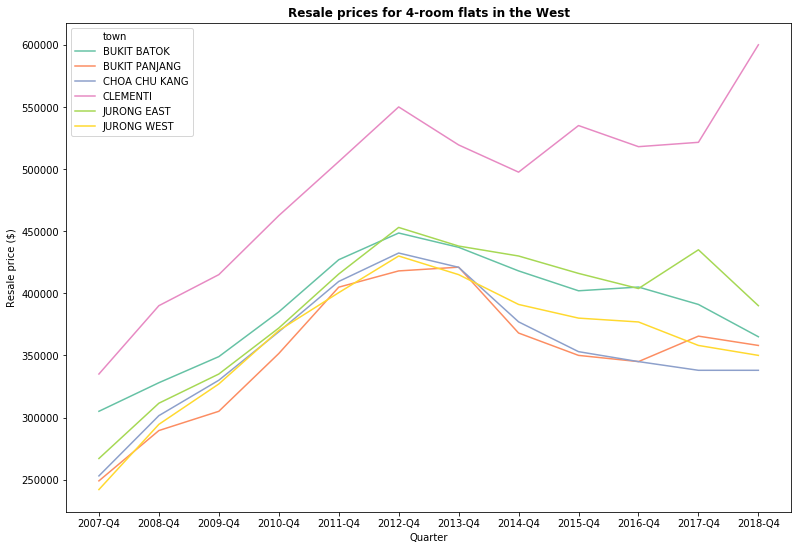

In [312]:
# 4 room flat price trend for all West towns
four = result[result["flat_type"] == "4-RM"]

# Creating a line chart for 4-room flat price trend for West
fig_dims = (13, 9)
fig, ax=plt.subplots(figsize=fig_dims)
plt.title("Resale prices for 4-room flats in the West", fontweight="bold")
sns.lineplot(x=b.quarter, y="price", hue="town", palette="Set2", data=four).set(xlabel="Quarter", ylabel="Resale price ($)")

[Text(0.5, 0, 'Resale price ($)')]

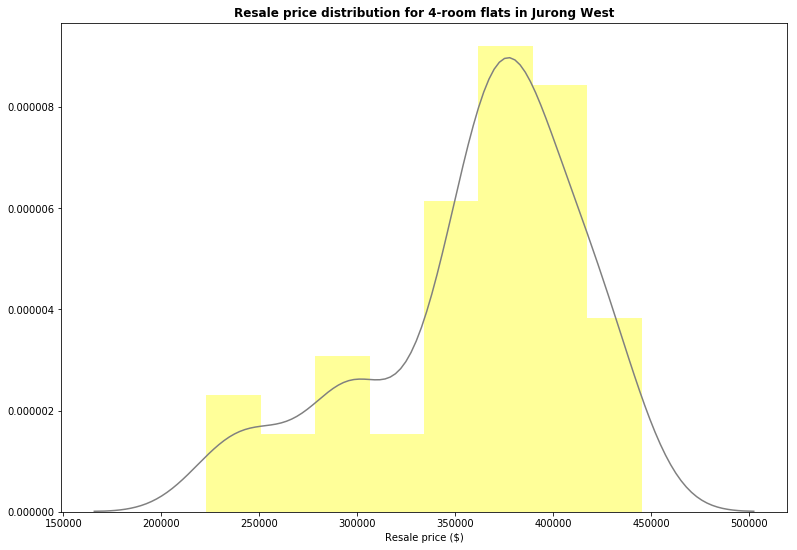

In [313]:
# Extract only Jurong West
jw = four[four.town == "JURONG WEST"]

# Creating a histogram for 4-room flats in Jurong West
fig_dims = (13, 9)
fig, ax=plt.subplots(figsize=fig_dims)
plt.title("Resale price distribution for 4-room flats in Jurong West", fontweight="bold")
sns.distplot(jw.price, color="yellow", kde_kws={"color": "gray"}).set(xlabel="Resale price ($)")